In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pickle


# Importing data

In [28]:
df = pd.read_csv('dataset.csv')


In [29]:
df.head()

,Height,Bust,Waist,Hips,BodyShape,URL,Season
0,174.0,81.0,64.0,91.0,Pear,https://birdsnest-images.imgix.net/system/imag...,Summer
1,178.0,86.0,67.0,89.0,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Summer
2,175.0,84.0,72.0,98.0,Pear,https://birdsnest-images.imgix.net/system/imag...,Winter
3,179.0,84.0,64.0,90.0,Pear,https://birdsnest-images.imgix.net/system/imag...,Summer
4,178.0,84.0,64.0,91.0,Pear,https://images.prismic.io/birdsnest-blog/0f008...,Summer


In [30]:
df = df.drop(['URL'], axis = 1)

In [31]:
df = df.drop(['Season'], axis = 1)

# Exploratory Data Analysis

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height     2440 non-null   float64
 1   Bust       2440 non-null   float64
 2   Waist      2440 non-null   float64
 3   Hips       2440 non-null   float64
 4   BodyShape  2440 non-null   object 
dtypes: float64(4), object(1)
memory usage: 95.4+ KB


## Checking for missing values

## continuing with the plots

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

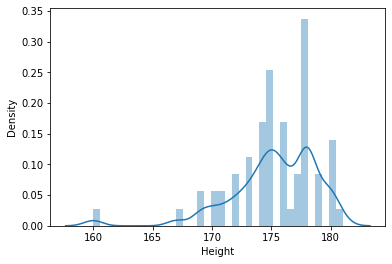

In [33]:
sns.distplot(df.Height)

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bust', ylabel='Density'>

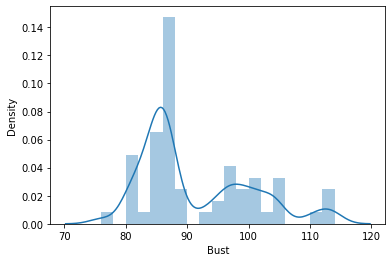

In [34]:
sns.distplot(df.Bust)

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Waist', ylabel='Density'>

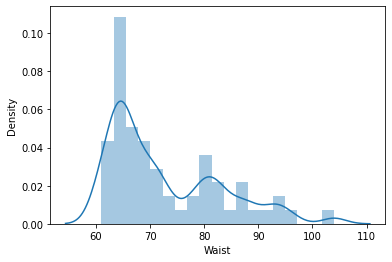

In [35]:
sns.distplot(df.Waist)

C:\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hips', ylabel='Density'>

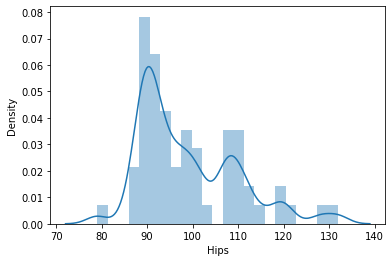

In [36]:
sns.distplot(df.Hips)

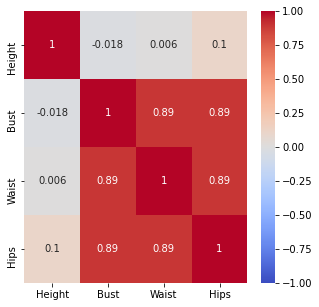

In [37]:
#correlation between numerical columns
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

### Counting the number of Unique Body Shapes

In [38]:
df.BodyShape.nunique()

3

In [40]:
df.head()

,Height,Bust,Waist,Hips,BodyShape
0,174.0,81.0,64.0,91.0,Pear
1,178.0,86.0,67.0,89.0,Rectangle
2,175.0,84.0,72.0,98.0,Pear
3,179.0,84.0,64.0,90.0,Pear
4,178.0,84.0,64.0,91.0,Pear


# Splitting the data into test and train

In [41]:
X=df.drop('BodyShape', axis=1)
Y=df[['BodyShape']]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2)

In [44]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 2202 to 1112
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  1952 non-null   float64
 1   Bust    1952 non-null   float64
 2   Waist   1952 non-null   float64
 3   Hips    1952 non-null   float64
dtypes: float64(4)
memory usage: 76.2 KB


In [45]:
Ytrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 2202 to 1112
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BodyShape  1952 non-null   object
dtypes: object(1)
memory usage: 30.5+ KB


In [46]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1537 to 1324
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  488 non-null    float64
 1   Bust    488 non-null    float64
 2   Waist   488 non-null    float64
 3   Hips    488 non-null    float64
dtypes: float64(4)
memory usage: 19.1 KB


In [47]:
Ytest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1537 to 1324
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BodyShape  488 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


# Building a Decision Tree Model

In [48]:
from sklearn.tree import  DecisionTreeClassifier

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
#creating a model
model = DecisionTreeClassifier(criterion = 'entropy')

In [51]:
#fitting the model
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy')

In [52]:
#predicting using the model and the train data
preds = model.predict(Xtrain)

In [54]:
# Accuracy = train
np.mean(Ytrain.BodyShape == preds) #training accuracy of 98%

1.0

In [55]:
#predicting using the model and the validation data
preds1 = model.predict(Xtest)

In [56]:
# Accuracy = test
np.mean(Ytest.BodyShape == preds1) #test accuracy of 98%

1.0

In [57]:
#precision and recall of the decision tree model
# print(confusion_matrix(Ytest, preds1))
print(classification_report(Ytest, preds1))

              precision    recall  f1-score   support

  Hour Glass       1.00      1.00      1.00       101
        Pear       1.00      1.00      1.00       312
   Rectangle       1.00      1.00      1.00        75

    accuracy                           1.00       488
   macro avg       1.00      1.00      1.00       488
weighted avg       1.00      1.00      1.00       488



In [58]:
pickle.dump(model, open('model.pkl','wb'))

### creating a new dataframe with values for prediction and predicting the data

In [87]:
X_predict = pd.DataFrame({'Height':[178],'Bust':[86],'Waist':[67],'Hips':[89]})

In [88]:
preds2 = model.predict(X_predict)

In [89]:
preds2[0]

'Rectangle'

In [90]:
df_cloth = pd.read_csv('recommenderdata.csv')

In [91]:
df_rec_winter = df_cloth[(df_cloth['BodyShape'] == preds2[0]) & (df_cloth['Season'] == "Winter") ] 

In [92]:
df_rec_summer = df_cloth[(df_cloth['BodyShape'] == preds2[0]) & (df_cloth['Season'] == "Summer") ] 

In [93]:
df_rec_winter.head()

,BodyShape,URL,Season
41,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Winter
56,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Winter


In [94]:
df_rec_summer.head()

,BodyShape,URL,Season
1,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Summer
10,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Summer
15,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Summer
34,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Summer
43,Rectangle,https://birdsnest-images.imgix.net/system/imag...,Summer


In [95]:
df_rec_winter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 41 to 56
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BodyShape  2 non-null      object
 1   URL        2 non-null      object
 2   Season     2 non-null      object
dtypes: object(3)
memory usage: 64.0+ bytes


In [100]:
df_rec_winter.URL

41    https://birdsnest-images.imgix.net/system/imag...
56    https://birdsnest-images.imgix.net/system/imag...
Name: URL, dtype: object


In [96]:
df_rec_summer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1 to 47
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   BodyShape  7 non-null      object
 1   URL        7 non-null      object
 2   Season     7 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [101]:
summer_clothes = df_rec_summer["URL"].tolist()

In [102]:
summer_clothes

['https://birdsnest-images.imgix.net/system/images/0749/9751/BIRDK-118_023.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423',
 'https://birdsnest-images.imgix.net/system/images/0619/7137/BIRDK-52-Red-2017-05-24-BirdsNest1017.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423',
 'https://birdsnest-images.imgix.net/system/images/0849/0991/SUG-T0194__CreamMulti_002.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423',
 'https://birdsnest-images.imgix.net/system/images/0621/9637/BIRDK-42__Black_002.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423',
 'https://birdsnest-images.imgix.net/system/images/0553/2071/BOHO-245__Black_017.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423',
 'https://birdsnest-images.imgix.net/system/images/0705/1429/NAU-PJ-04-SS__Cornflour_015.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423',
 'https://birdsnest-images.imgix.net/system/images/0595/6357/BIRDK-359-SmokeyGrey-2017.05.25-BirdsNest-Day2374AAA.jpg?ixlib=rails-2.1.4&auto

In [103]:
winter_clothes = df_rec_winter["URL"].tolist()

In [104]:
winter_clothes

['https://birdsnest-images.imgix.net/system/images/0826/1313/HAND-82-R__RedCheck_5464.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423',
 'https://birdsnest-images.imgix.net/system/images/0842/7395/FOI-FO5178__SilverMix_011.jpg?ixlib=rails-2.1.4&auto=format%2Ccompress&q=75&w=423']

### predicting the image url using the provided data

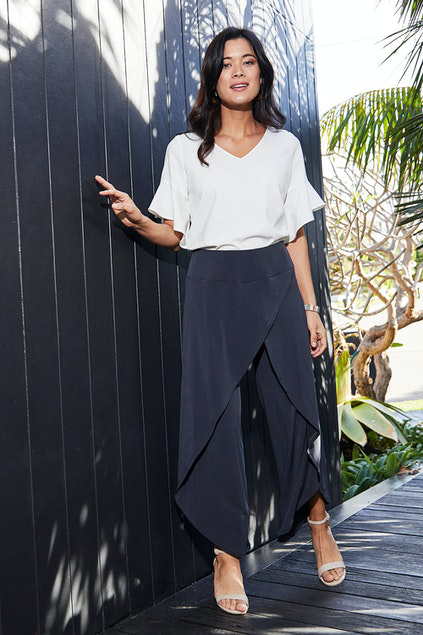

In [ ]:
# prediction = model.predict(X_predict)
# response = requests.get(prediction[0])
# file = open("predicted_image.png", "wb")
# file.write(response.content)
# file.close()
# path="predicted_image.png"
# display(Image.open(path))



---





---


